### Подключение библиотек

In [127]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

### Загрузка датасета

In [128]:
df = pd.read_csv("UniversalBank.csv")
df.head(5)

,Row,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


### Удаление лишних столбцов

In [129]:
df = df.drop(columns=["Row", "ZIP Code"])

### Разделение данных на признаки и целевую переменную

In [130]:
X = df.drop(columns= ["Personal Loan"])
y = df["Personal Loan"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

### Построение дерева решений

In [131]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42, criterion="entropy")
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

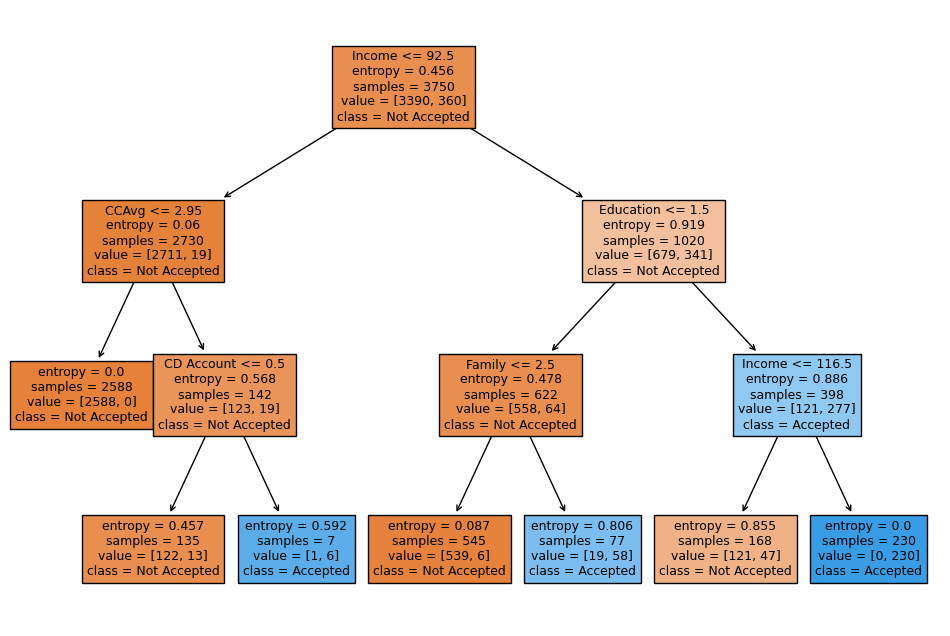

In [132]:
plt.figure(figsize=(12,8))
tree.plot_tree(dt, filled=True, class_names=["Not Accepted", "Accepted"], feature_names=list(X_train.columns))
plt.show()

## Набор данных mushrooms

### Загрузка пакетов

In [133]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

### Загрузка датасета

In [134]:
data = pd.read_csv("mushrooms.csv")
data.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


### Создание численных переменных OneHotEncoding

In [135]:
data_encoded = pd.get_dummies(data, drop_first=True)
data_encoded.head(5)

,class_p,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


### Разделение датасета на признаки и целевую переменную

In [136]:
X = data_encoded.drop("class_p", axis=1)
y = data_encoded["class_p"]
X.columns.values
X.shape

(8124, 95)

### Разделение данных на тренировочные и тестовые

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2123, stratify=y)

### Строим модель на основе DT

In [138]:
dt_model = DecisionTreeClassifier(max_depth=6, random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=42)

### Построение матрицы ошибок

In [139]:
y_pred_test = dt_model.predict(X_test)
conf_matrix  =confusion_matrix(y_test, y_pred_test)
print(conf_matrix)

[[1048    4]
 [   0  979]]


### Визуализация матрицы ошибок

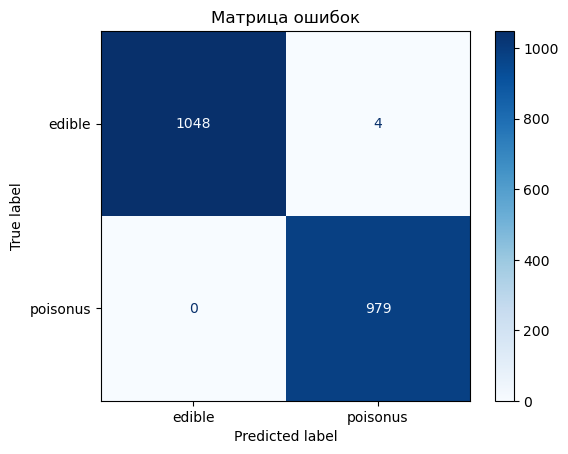

In [140]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["edible", "poisonus"])
disp.plot(cmap="Blues", values_format="d")
plt.title("Матрица ошибок")
plt.show()

### Оценка точности предсказания для набора train

In [141]:
y_pred_train = dt_model.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f"Оценка составит для train: {accuracy_train:.4f}")

Оценка составит для train: 0.9967


### Оценка точности предсказания для набора test

In [142]:
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"Оценка составит для test: {accuracy_test:.4f}")


Оценка составит для test: 0.9980


### Важные признаки

In [143]:
feature_importances = pd.DataFrame({"Feature": X_train.columns, "Importance": dt_model.feature_importances_})
top_feature = feature_importances.sort_values(by="Importance", ascending=False).head(5)
print(top_feature)

                Feature  Importance
22               odor_n    0.618070
42         stalk-root_c    0.180392
44         stalk-root_r    0.088211
80  spore-print-color_r    0.034079
81  spore-print-color_u    0.024281


### Визуализация дерева решений

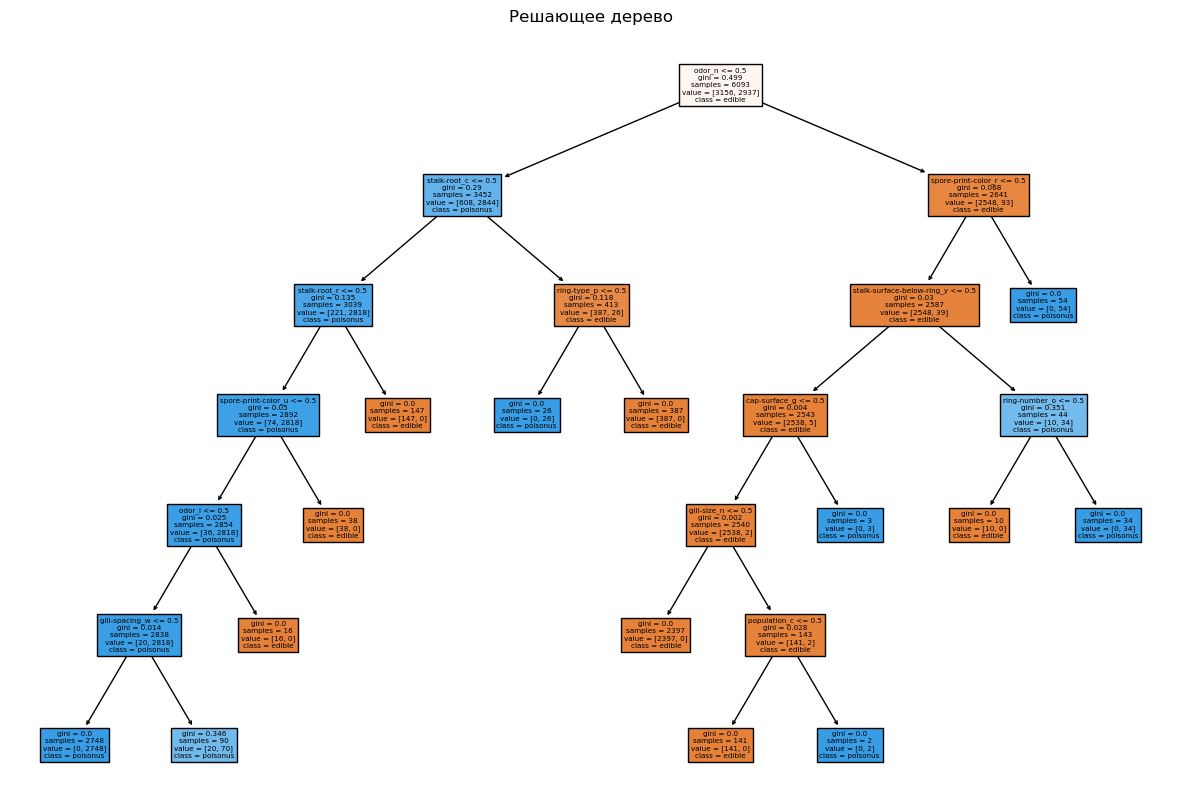

In [144]:
plt.figure(figsize=(15,10))
plot_tree(dt_model, filled=True, class_names=["edible", "poisonus"], feature_names=list(X_train.columns))
plt.title("Решающее дерево")
plt.show()